In [14]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# matplotlib 한글 문제
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [18]:
salary = pd.read_csv(r"C:\pythondata\기계학습_함건희교수_금123\Team\Salary.csv", encoding = 'utf-8')
salary

Age  Gender  Education Level              Job Title  \
0     32.0    Male                1      Software Engineer   
1     28.0  Female                2           Data Analyst   
2     45.0    Male                3                Manager   
3     36.0  Female                1        Sales Associate   
4     52.0    Male                2               Director   
...    ...     ...              ...                    ...   
6679  49.0  Female                3  Director of Marketing   
6680  32.0    Male                0        Sales Associate   
6681  30.0  Female                1      Financial Manager   
6682  46.0    Male                2      Marketing Manager   
6683  26.0  Female                0        Sales Executive   

      Years of Experience    Salary    Country        Race  Senior  
0                     5.0   90000.0         UK       White       0  
1                     3.0   65000.0        USA    Hispanic       0  
2                    15.0  150000.0     Canada       White       1  
3                     7.0   60000.0        USA    Hispanic       0  
4                    20.0  200000.0        USA       Asian       0  
...                   ...       ...        ...         ...     ...  
6679                 20.0  200000.0         UK       Mixed       0  
6680                  3.0   50000.0  Australia  Australian       0  
6681                  4.0   55000.0      China     Chinese       0  
6682                 14.0  140000.0      China      Korean       0  
6683                  1.0   35000.0     Canada       Black       0  

[6684 rows x 9 columns]

In [19]:
salary.columns

Index(['Age', 'Gender', 'Education Level', 'Job Title', 'Years of Experience',
       'Salary', 'Country', 'Race', 'Senior'],
      dtype='object')

# 동일 나이에서의 연봉 최고와 연봉 최저

In [20]:
grouped_age = salary.groupby('Age')['Salary'].agg(['max', 'min']).reset_index()
grouped_age

Age       max       min
0   21.0   25000.0   25000.0
1   22.0   51832.0   25000.0
2   23.0  119836.0     579.0
3   24.0  125000.0   25000.0
4   25.0  169159.0     550.0
5   26.0  135000.0   26000.0
6   27.0  180000.0   30000.0
7   28.0  175000.0   25000.0
8   29.0  182000.0     350.0
9   30.0  190000.0   25000.0
10  31.0  195000.0     500.0
11  32.0  195000.0   40000.0
12  33.0  198000.0   25000.0
13  34.0  196000.0   50000.0
14  35.0  190000.0   35000.0
15  36.0  185000.0   35000.0
16  37.0  195000.0   75000.0
17  38.0  195000.0   80000.0
18  39.0  210000.0   55000.0
19  40.0  215000.0   60000.0
20  41.0  200000.0   80000.0
21  42.0  197000.0  100000.0
22  43.0  198000.0  105000.0
23  44.0  220000.0  110000.0
24  45.0  250000.0   80000.0
25  46.0  220000.0  120000.0
26  47.0  200000.0  135000.0
27  48.0  219000.0  140000.0
28  49.0  228000.0  120177.0
29  50.0  250000.0  130000.0
30  51.0  240000.0  130000.0
31  52.0  250000.0  161568.0
32  53.0  195000.0  180000.0
33  54.0  195270.0  179756.0
34  55.0  210000.0  183020.0
35  56.0  210000.0  195000.0
36  57.0  200000.0  121450.0
37  58.0  200000.0  190004.0
38  60.0  195000.0  179180.0
39  61.0  200000.0  200000.0
40  62.0  200000.0  200000.0

In [21]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='max', data=grouped_age, label='Max Salary')
sns.lineplot(x='Age', y='min', data=grouped_age, label='Min Salary')

plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Max and Min Salary by Age Group')

plt.legend()

plt.show()

# 나이는 높은데 경력은 적은 사람과 나이는 낮지만 경력이 많은 사람과의 연봉 비교

In [33]:
grouped_salary = salary.groupby('Salary')['Age'].agg(['min', 'max']).reset_index()
grouped_salary

Salary   min   max
0       350.0  29.0  29.0
1       500.0  31.0  31.0
2       550.0  25.0  25.0
3       579.0  23.0  23.0
4     25000.0  21.0  33.0
..        ...   ...   ...
432  220000.0  44.0  49.0
433  225000.0  50.0  50.0
434  228000.0  49.0  49.0
435  240000.0  51.0  51.0
436  250000.0  45.0  52.0

[437 rows x 3 columns]

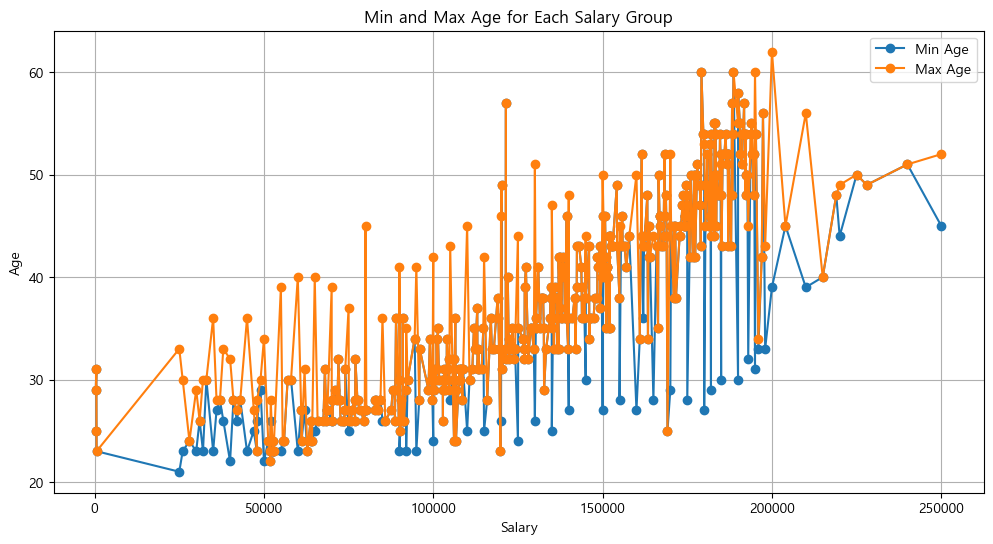

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_salary['Salary'], grouped_salary['min'], label='Min Age', marker='o')
plt.plot(grouped_salary['Salary'], grouped_salary['max'], label='Max Age', marker='o')

# Adding labels and title
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Min and Max Age for Each Salary Group')

# Displaying the legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()

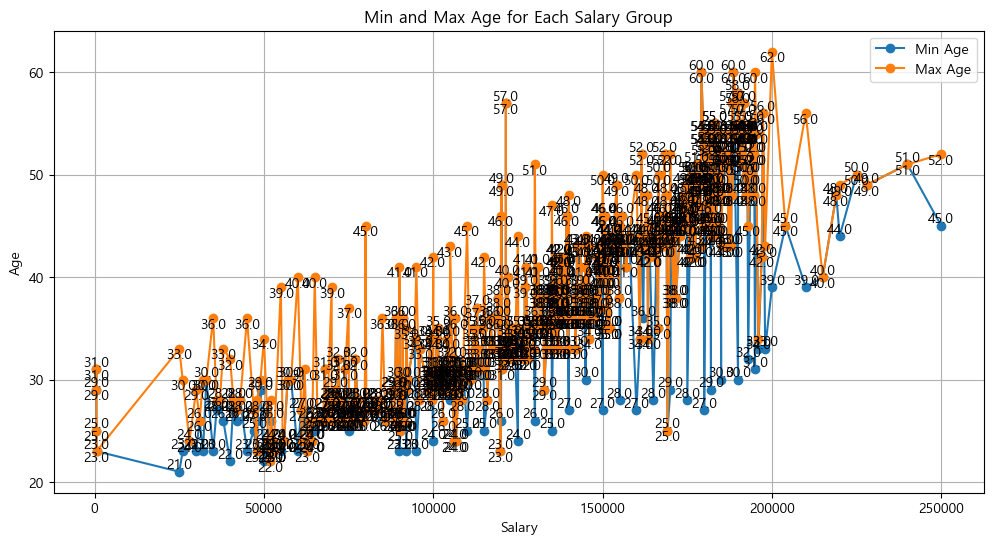

In [38]:
plt.figure(figsize=(12, 6))
plt.plot(grouped_salary['Salary'], grouped_salary['min'], label='Min Age', marker='o')
plt.plot(grouped_salary['Salary'], grouped_salary['max'], label='Max Age', marker='o')

# Adding labels and title
plt.xlabel('Salary')
plt.ylabel('Age')
plt.title('Min and Max Age for Each Salary Group')

# Annotating each point with the actual age values
for i, (min_age, max_age) in enumerate(zip(grouped_salary['min'], grouped_salary['max'])):
    plt.text(grouped_salary['Salary'][i], min_age, f'{min_age}', ha='center', va='bottom')
    plt.text(grouped_salary['Salary'][i], max_age, f'{max_age}', ha='center', va='top')

# Displaying the legend
plt.legend()

# Displaying the plot
plt.grid(True)
plt.show()


In [39]:
grouped_salary['diff'] = grouped_salary['max'] - grouped_salary['min']
grouped_salary

Salary   min   max  diff
0       350.0  29.0  29.0   0.0
1       500.0  31.0  31.0   0.0
2       550.0  25.0  25.0   0.0
3       579.0  23.0  23.0   0.0
4     25000.0  21.0  33.0  12.0
..        ...   ...   ...   ...
432  220000.0  44.0  49.0   5.0
433  225000.0  50.0  50.0   0.0
434  228000.0  49.0  49.0   0.0
435  240000.0  51.0  51.0   0.0
436  250000.0  45.0  52.0   7.0

[437 rows x 4 columns]

In [40]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Salary', y='diff', data=grouped_salary)

plt.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
